In [470]:
import numpy as np
import matplotlib.pyplot as plt 

In [349]:
# Initialise genotypes as random 1's and 0's.
genotypes = np.random.randint(0,2,size=10)

In [350]:
genotypes

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [351]:
# index[i][0] is the benefit, index[i][1] is the volume, where i = item
values = np.array([[5,3],[6,2],[1,4],[9,5],[2,8],[8,9],[4,10],[3,1],[7,6],[10,7]])

In [352]:
# For example, the 4th item's volume and benefit are the following:
print("4th item benefit:",values[3][0])
print("4th item volume:",values[3][1])

4th item benefit: 9
4th item volume: 5


In [353]:
for i,gt in enumerate(genotypes):
    print(i,gt)

0 1
1 0
2 1
3 1
4 1
5 1
6 0
7 1
8 1
9 0


In [354]:
# Knapsack volume
knapsack = 20

In [355]:
# If the item is in the knapsack (1), add it to the list. If not (0), do nothing.
def itemsInKnapsack(values,genotypes):
    items = []
    for i,gt in enumerate(genotypes):
        if gt == 1:
            items.append(values[i])
    items = np.array(items)
    return items

In [356]:
# Test it.
items = itemsInKnapsack(values,genotypes)
items

array([[5, 3],
       [1, 4],
       [9, 5],
       [2, 8],
       [8, 9],
       [3, 1],
       [7, 6]])

In [357]:
# Now, calculate the total volume of the items in the knapsack.
def totalVolume(gt,vals):
    capacity = 0
    for i,gene in enumerate(gt):
        if gene == 1:
            capacity += vals[i][1]
    return capacity

In [358]:
# Test it
totalVolume(genotypes,values)

36

In [359]:
# Now, calculate the total benefit of the items in the knapsack
def totalBenefit(gt,vals):
    benefit = 0
    for i,gene in enumerate(gt):
        if gene == 1:
            benefit += vals[i][0]
    return benefit

In [360]:
# Test it
totalBenefit(genotypes,values)

35

In [361]:
# Mutation for changing the 1's and 0's
def mutation(genotypes,mutation_rate):
    for i,gene in enumerate(genotypes):
        n = np.random.rand()
        #print(n)
        if n <= mutation_rate:
            if genotypes[i] == 1:
                genotypes[i] = 0
            else:
                genotypes[i] = 1
    return genotypes

In [362]:
genotypes

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [373]:
# If volume of items in the knapsack > 20, return 0. Otherwise, return the total benefit.
def setup(vals,knapsack,genotypes,mutation_rate=0.1):
    #items = itemsInKnapsack(vals,genotypes)
    vol = totalVolume(genotypes,vals)
    benefit = totalBenefit(genotypes,vals)
    if vol <= knapsack:
        return benefit,vol
    else:
        return setup(vals,knapsack,mutation(genotypes,mutation_rate),mutation_rate)

In [374]:
# Test it
setup(values,knapsack,genotypes)

(12, 20)

In [432]:
# Now for the actual fitness function
def fitness(vals,genotypes,mutation_rate,hillclimbers,knapsack):
    #items = itemsInKnapsack(vals,genotypes)
    initial = setup(vals,knapsack,genotypes)
    fit = []
    for i in range(hillclimbers):
        new_gt = mutation(genotypes,mutation_rate)
        new_ft = setup(vals,knapsack,new_gt)
        if new_ft[0] > initial[0]:
            initial = new_ft
            fit.append(initial)
        else:
            initial = initial
            fit.append(initial)
    return fit

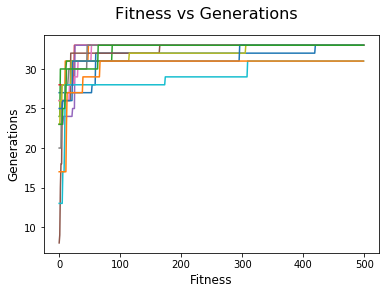

In [469]:
def plot_hillclimber(values, genotypes, mutation_rates, hillclimbers, knapsack):
    generations=[]
    for i in range(hillclimbers):
        generations.append(i)
    
    for i in range(len(mutation_rates)):
        fit = []
        fitnesses = fitness(values,genotypes,mutation_rates[i],hillclimbers,knapsack)
        for f in fitnesses:
            fit.append(f[0])
        plt.suptitle('Fitness vs Generations', fontsize=16)
        plt.ylabel('Generations', fontsize=12)
        plt.xlabel('Fitness', fontsize=12)
        plt.plot(generations,fit)
plot_hillclimber(values,genotypes,[0.3,0.4,0.5,.66,.23,.12,.54,.57,1,.13,.14,.03,.15],500,20)

In [ ]:
from itertools import combinations


def brute_force(number, capacity, weight_cost):
    """Brute force method for solving knapsack problem
    :param number: number of existing items
    :param capacity: the capacity of knapsack
    :param weight_cost: list of tuples like: [(weight, cost), (weight, cost), ...]
    :return: tuple like: (best cost, best combination list(contains 1 and 0))
    """
    best_cost = None
    best_combination = []
    # generating combinations by all ways: C by 1 from n, C by 2 from n, ...
    for way in range(number):
        for comb in combinations(weight_cost, way + 1):
            weight = sum([wc[0] for wc in comb])
            cost = sum([wc[1] for wc in comb])
            if (best_cost is None or best_cost < cost) and weight <= capacity:
                best_cost = cost
                best_combination = [0] * number
                for wc in comb:
                    best_combination[weight_cost.index(wc)] = 1
    return best_cost, best_combination

# Brute force method to find the best combination

In [587]:
values2 = [[5,3],[6,2],[1,4],[9,5],[2,8],[8,9],[4,10],[3,1],[7,6],[10,7]]

In [588]:
def brute_force(itemsNo,knapsack,values):
    best_cost = 0
    best_combination = []
    #for pop in range(populationSize):
    for way in range(itemsNo):
        for comb in combinations(values,way+1):
            weight = sum([w[1] for w in comb])
            benefit = sum(b[0] for b in comb)
            if (best_cost < benefit) and weight <= knapsack:
                best_cost = benefit
                best_combination = [0]*itemsNo
                for bw in comb:
                    best_combination[values.index(bw)] = 1
    return best_cost,best_combination

In [589]:
brute_force(10,20,values2)

(33, [1, 1, 0, 1, 0, 0, 0, 1, 0, 1])

# For different population sizes

In [471]:
populationSize = 100

In [475]:
numOfItems = len(values)

In [477]:
numOfItems

10

In [501]:
# each row is a population
popGenotypes = np.random.randint(0,2,size=(populationSize,numOfItems))

In [508]:
popGenotypes.shape

(100, 10)

In [509]:
# Mutation for changing the 1's and 0's in a population
def pop_mutation(pop_genotypes,mutation_rate,populationSize):
    for p in range(populationSize):
        for i in range(0,10):
            n = np.random.rand()
            #print(n)
            if n <= mutation_rate:
                if pop_genotypes[p][i] == 1:
                    pop_genotypes[p][i] = 0
                else:
                    pop_genotypes[p][i] = 1
    return pop_genotypes

In [510]:
# Test it
test = pop_mutation(popGenotypes,0.2,populationSize)

In [512]:
# index[i][0] is the benefit, index[i][1] is the volume, where i = item
values = np.array([[5,3],[6,2],[1,4],[9,5],[2,8],[8,9],[4,10],[3,1],[7,6],[10,7]])

In [518]:
weights = []
for i in range(values.shape[0]):
    weights.append(values[i][1])
weights

[3, 2, 4, 5, 8, 9, 10, 1, 6, 7]

In [520]:
benefits = []
for i in range(values.shape[0]):
    benefits.append(values[i][0])
benefits

[5, 6, 1, 9, 2, 8, 4, 3, 7, 10]

In [526]:
# If the item is in the knapsack (1), add it to the list. If not (0), do nothing.
def itemsInKnapsack(populationSize,values,genotypes):
    items = []
    no = []
    for i in range(100):
        for p in range(0,10):
            if popGenotypes[i][p] == 1:
                items.append(popGenotypes[i][p])
            else:
                no.append(popGenotypes[i][p])
    return items

In [551]:
values2 = [[5,3],[6,2],[1,4],[9,5],[2,8],[8,9],[4,10],[3,1],[7,6],[10,7]]

In [577]:
def brute_force(itemsNo,knapsack,weight_cost):
    best_cost = 0
    best_combination = []
    #for pop in range(populationSize):
    for way in range(itemsNo):
        for comb in combinations(weight_cost,way+1):
            weight = sum([w[1] for w in comb])
            benefit = sum(b[0] for b in comb)
            if (best_cost < benefit) and weight <= knapsack:
                best_cost = benefit
                best_combination = [0]*itemsNo
                for bw in comb:
                    best_combination[weight_cost.index(bw)] = 1
    return best_cost,best_combination

In [578]:
brute_force(10,20,values2)

(33, [1, 1, 0, 1, 0, 0, 0, 1, 0, 1])